In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

### Exercise 1

In the "IAValues" dataset, there are a number of missing (null) values for the rootznaws column, which measures root zone available water storage.  The goal of this challenge is to create a simple model to predict those missing values.

- Load the dataset and perform and appropriate inspection of the data to verify that it is suitable for building a model.

- Build a model (please explain your choice of model and why you choose it over alternatives) to predict the value of rootznaws.

- Use your model to predict the missing values of rootznaws.

- Analyze/discuss the accuracy of your model and any potential improvements you'd make on it given more time.

In [2]:
df1 = pd.read_csv('./data/IAValues_updated_v2.txt')

In [3]:
df1.head(5)

,Unnamed: 0,Unnamed: 0.1,mukey,OBJECTID_1,tk0_5a,tk5_20a,tk20_50a,tk50_100a,tk100_150a,tk150_999a,...,nccpi2cs,nccpi2sg,nccpi2co,nccpi2all,pctearthmc,rootznemc,rootznaws,droughty,pwsl1pomu,musumcpct
0,0,0,1601875,55642,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
1,1,1,1601876,55643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
2,2,2,1601877,55584,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,0,100
3,3,3,1601878,55622,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,999,100
4,4,4,1601879,55652,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0,100


In [4]:
df1.info() 
# only 'rootznaws' has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 49 columns):
Unnamed: 0      10801 non-null int64
Unnamed: 0.1    10801 non-null int64
mukey           10801 non-null int64
OBJECTID_1      10801 non-null int64
tk0_5a          10801 non-null float64
tk5_20a         10801 non-null float64
tk20_50a        10801 non-null float64
tk50_100a       10801 non-null float64
tk100_150a      10801 non-null float64
tk150_999a      10801 non-null float64
tk0_20a         10801 non-null float64
tk0_30a         10801 non-null float64
tk0_100a        10801 non-null float64
tk0_150a        10801 non-null float64
tk0_999a        10801 non-null float64
musumcpcta      10801 non-null int64
soc0_5          10801 non-null float64
soc5_20         10801 non-null float64
soc20_50        10801 non-null float64
soc50_100       10801 non-null float64
soc100_150      10801 non-null float64
soc150_999      10801 non-null float64
soc0_20         10801 non-null float64
soc0

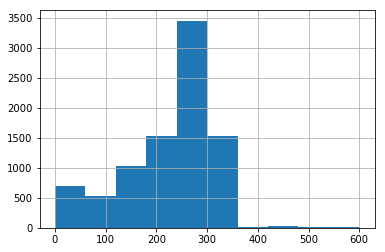

In [5]:
# distribution of rootznaws 
df1['rootznaws'].hist()

The histogram above indicates that the value of feature 'rootznaws' is a contunous variable and is cencored around 400. The left histogram indicates that this feature follow a Gaussian distribution. It is possible that the missing values will be located at the right part of the Gaussian distribution. Initially, I thought about using KNN for missing value inference. Given that almost all the obsevations of 'rootznaws' with the value above 400 is missing, I figured out that it might not be a good solution. Instead, I will use Linear regression. It is a simple model and can be regarded as a baseline model

In [6]:
# get rid of ids and divide dataset into two parts
# - 1, X_train, which has non-missing 'rootznaws'
# - 2, X_missing, which has missing 'rootznaws'
X = df1.iloc[:,4:][df1.rootznaws.notnull()]
X_train = X.loc[:, X.columns != 'rootznaws']
y_train = X['rootznaws']
X_missing = df1.iloc[:,4:][df1.rootznaws.isnull()]
X_missing = X.loc[:, X.columns != 'rootznaws']

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
y_pred = lm.predict(X_missing)

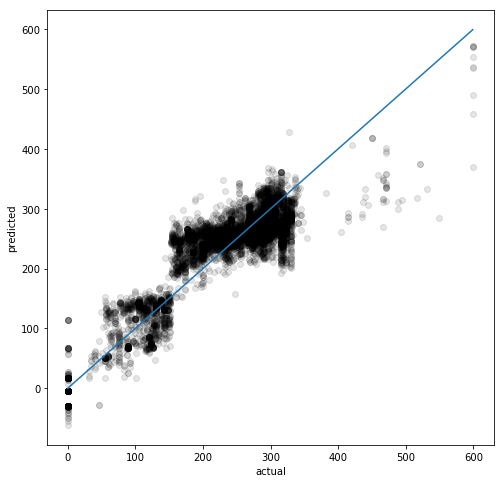

In [10]:
# Plot outputs
# x-axis, actual value; 
# y-axis, predicted value.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel('actual')
ax.set_ylabel('predicted')

plt.scatter(y_train, y_pred, color='black', alpha = .1)

# diagnoal line indicating perfect prediction
plt.plot(np.arange(0, 600), np.arange(0, 600)) 

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred)

1413.281060713126

### Exercise 2

In the "muaggatt" file, you'll find some additional parameters keyed to the mukey variable.  

- Load this dataset, and evaluate how much the additional covariates in this dataset can improve the accuracy of your model.

In [12]:
df2 = pd.read_csv('./data/muaggatt.txt')

In [13]:
df2.head(2)

,OBJECTID,musym,muname,mustatus,slopegraddcp,slopegradwta,brockdepmin,wtdepannmin,wtdepaprjunmin,flodfreqdcd,...,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdcd,urbrecptwta,forpehrtdcp,hydclprs,awmmfpwwta,mukey
0,1,5040,"Orthents, loamy",NaN,0.0,0.0,0,0,0,NaN,...,Not rated,Not rated,Not rated,Not rated,Not rated,0.0,Not rated,0,0.0,1601875
1,2,5080,"Orthents, sanitary landfill",NaN,14.0,14.0,0,0,0,None,...,Not rated,Not rated,Not rated,Not rated,Not rated,0.0,Not rated,0,0.0,1601876


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 41 columns):
OBJECTID          10801 non-null int64
musym             10801 non-null object
muname            10801 non-null object
mustatus          0 non-null float64
slopegraddcp      10801 non-null float64
slopegradwta      10801 non-null float64
brockdepmin       10801 non-null int64
wtdepannmin       10801 non-null int64
wtdepaprjunmin    10801 non-null int64
flodfreqdcd       10431 non-null object
flodfreqmax       10433 non-null object
pondfreqprs       10801 non-null int64
aws025wta         10801 non-null float64
aws050wta         10801 non-null float64
aws0100wta        10801 non-null float64
aws0150wta        10801 non-null float64
drclassdcd        10115 non-null object
drclasswettest    10121 non-null object
hydgrpdcd         10056 non-null object
iccdcd            196 non-null float64
iccdcdpct         10801 non-null int64
niccdcd           10071 non-null float64
niccdcdpct    

In [15]:
df2 = df2.dropna(axis = 1)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 33 columns):
OBJECTID          10801 non-null int64
musym             10801 non-null object
muname            10801 non-null object
slopegraddcp      10801 non-null float64
slopegradwta      10801 non-null float64
brockdepmin       10801 non-null int64
wtdepannmin       10801 non-null int64
wtdepaprjunmin    10801 non-null int64
pondfreqprs       10801 non-null int64
aws025wta         10801 non-null float64
aws050wta         10801 non-null float64
aws0100wta        10801 non-null float64
aws0150wta        10801 non-null float64
iccdcdpct         10801 non-null int64
niccdcdpct        10801 non-null int64
engdwobdcd        10801 non-null object
engdwbdcd         10801 non-null object
engdwbll          10801 non-null object
engdwbml          10801 non-null object
engstafdcd        10801 non-null object
engstafll         10801 non-null object
engstafml         10801 non-null object
engsldcd    

In [17]:
df3 = df1.merge(df2, left_on = 'mukey', right_on = 'mukey', how = 'left', suffixes=['', '_y'])

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10800
Data columns (total 81 columns):
Unnamed: 0        10801 non-null int64
Unnamed: 0.1      10801 non-null int64
mukey             10801 non-null int64
OBJECTID_1        10801 non-null int64
tk0_5a            10801 non-null float64
tk5_20a           10801 non-null float64
tk20_50a          10801 non-null float64
tk50_100a         10801 non-null float64
tk100_150a        10801 non-null float64
tk150_999a        10801 non-null float64
tk0_20a           10801 non-null float64
tk0_30a           10801 non-null float64
tk0_100a          10801 non-null float64
tk0_150a          10801 non-null float64
tk0_999a          10801 non-null float64
musumcpcta        10801 non-null int64
soc0_5            10801 non-null float64
soc5_20           10801 non-null float64
soc20_50          10801 non-null float64
soc50_100         10801 non-null float64
soc100_150        10801 non-null float64
soc150_999        10801 non-null float64

In [19]:
# similar to the Exercise 1, but will get rid of categorical variables first due to limited time for processing them
X = df3.iloc[:,list(df3.dtypes != 'object')]
X = X.iloc[:,4:][X.rootznaws.notnull()]
X_train = X.loc[:, X.columns != 'rootznaws']
y_train = X['rootznaws']
X_missing = df1.iloc[:,4:][df1.rootznaws.isnull()]
X_missing = X.loc[:, X.columns != 'rootznaws']

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = lm.predict(X_missing)

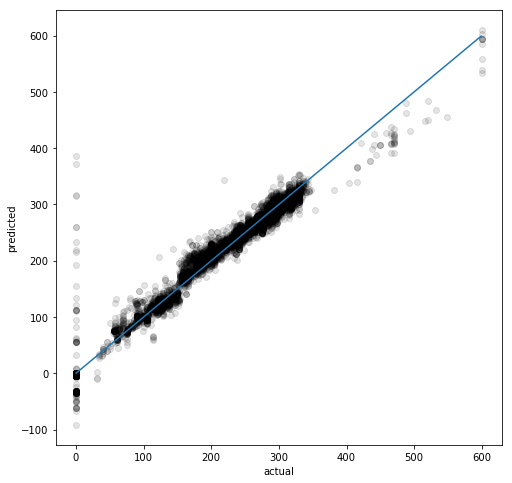

In [22]:
# Plot outputs
# x-axis, actual value; 
# y-axis, predicted value.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel('actual')
ax.set_ylabel('predicted')

plt.scatter(y_train, y_pred, color='black', alpha = .1)

# diagnoal line indicating perfect prediction
plt.plot(np.arange(0, 600), np.arange(0, 600)) 

plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred)

283.33901144083922

Bothe the 'actual' vs 'predicted' plot and mean squared error confirms that the added features improved the model performance